In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
car=pd.read_csv('quikr_car.csv')
car.head()
car.shape

(892, 6)

In [3]:
car.describe()
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [4]:
car.isnull().sum()
#There are null Values in the kms_driven and fuel_type

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

Identify the Problems.

In [5]:
car['year'].unique()
#The Problem in year is No relevant data and also it's of Object type
car['kms_driven'].unique()

car['Price'].unique()
#The Problem in Price is of Price as it contains Non relevant data and it's of object data type

#Problem in fuel type and name

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [6]:
#Create a Backup Copy 
backup=car.copy()

In [7]:
#first work on Price Now
car['Price'] = car['Price'].str.replace(',', '')  # Remove commas
car['Price'] = pd.to_numeric(car['Price'], errors='coerce')  # Convert to numeric type
car = car.dropna(subset=['Price'])  # Remove rows with non-numeric values
car['Price'] = car['Price'].astype(int)  # Convert to integer type
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 857 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        857 non-null    object
 1   company     857 non-null    object
 2   year        857 non-null    object
 3   Price       857 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(1), object(5)
memory usage: 43.5+ KB


In [8]:
#Work on Years
car=car[car['year'].str.isnumeric()]
car['year'] = car['year'].astype(int)  # Convert to integer type

car['year'].unique()
#Create a new column called "age"
# car['age'] = 2023 - car['year']
# car.head()


array([2007, 2006, 2014, 2012, 2013, 2016, 2015, 2010, 2017, 2008, 2018,
       2011, 2019, 2009, 2005, 2000, 2003, 2004, 1995, 2002, 2001])

In [9]:
#Work on Kmsdriven
car['kms_driven']=car['kms_driven'].str.split(' ').str.get(0)
car['kms_driven'] = car['kms_driven'].str.replace(',', '')  # Remove commas
car=car[car['kms_driven'].str.isnumeric()]
car['kms_driven']=car['kms_driven'].astype(int)
car['kms_driven'].unique()





array([ 45000,     40,  28000,  36000,  41000,  25000,  24530,  60000,
        30000,  32000,  48660,   4000,  16934,  43000,  35550,  39522,
        39000,  55000,  72000,  15975,  70000,  23452,  35522,  48508,
        15487,  82000,  20000,  68000,  38000,  27000,  33000,  46000,
        16000,  47000,  35000,  30874,  15000,  29685, 130000,  19000,
        54000,  13000,  38200,  22000,  50000,  13500,   3600,  45863,
        60500,  12500,  18000,  13349,  29000,  44000,  42000,  14000,
        49000,  36200,  51000, 104000,  33333,  33600,   5600,   7500,
        26000,  24330,  65480, 200000,  59000,  99000,   2800,  21000,
        11000,  66000,   3000,   7000,  38500,  37200,  43200,  24800,
        45872,  40000,  11400,  97200,  52000,  31000, 175430,  37000,
        65000,   3350,  75000,  62000,  73000,   2200,  54870,  34580,
        97000,     60,  80200,   3200,      0,   5000,    588,  71200,
       175400,   9300,  56758,  10000,  56450,  56000,  32700,   9000,
      

In [10]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [11]:
#Fuel Type
car=car[~car['fuel_type'].isna()]
#~ using this means Excluding the row with <expression> 
car['fuel_type'].isnull().sum()


0

In [12]:
#keep first 3 words of name
car['name']=car['name'].str.split(' ').str.slice(0,3).str.join(' ')

car=car.reset_index(drop=True)
car.head(25)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
5,Hyundai Eon,Hyundai,2013,190000,25000,Petrol
6,Ford EcoSport Ambiente,Ford,2016,830000,24530,Diesel
7,Maruti Suzuki Alto,Maruti,2015,250000,60000,Petrol
8,Skoda Fabia Classic,Skoda,2010,182000,60000,Petrol
9,Maruti Suzuki Stingray,Maruti,2015,315000,30000,Petrol


In [13]:
#there is outlier present in price
car=car[car['Price']<6e6].reset_index(drop=True)
car.describe()



,year,Price,kms_driven
count,815.000000,8.150000e+02,815.000000
mean,2012.442945,4.017933e+05,46277.096933
std,4.005079,3.815888e+05,34318.459638
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56879.000000
max,2019.000000,3.100000e+06,400000.000000


In [14]:
car.to_csv('clean-car.csv')


visualization

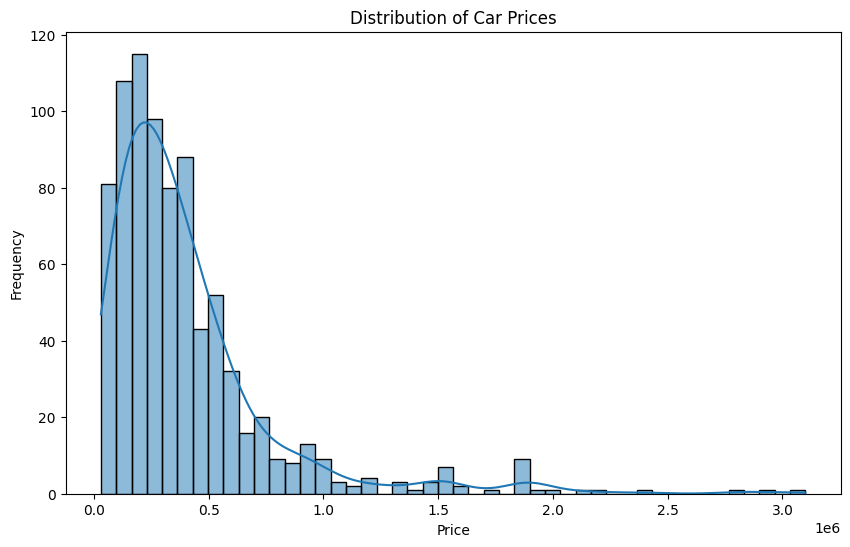

In [15]:
# Visualize the distribution of 'Price'
plt.figure(figsize=(10, 6))
sns.histplot(car['Price'], kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# As the car prices increases the no of cars people have low 


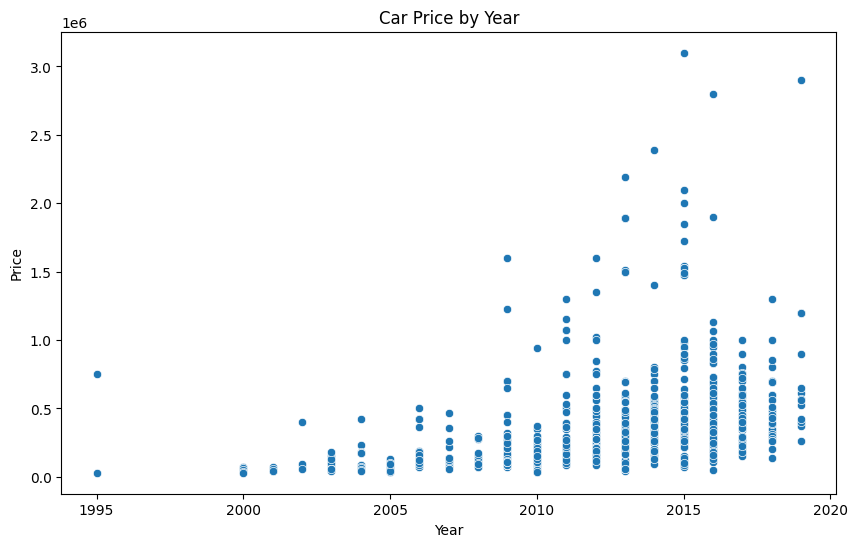

In [28]:
# Visualize the relationship between 'Price' and 'year'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=car, x='year', y='Price')
plt.title("Car Price by Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

<!-- people have more cars after 2015 -->

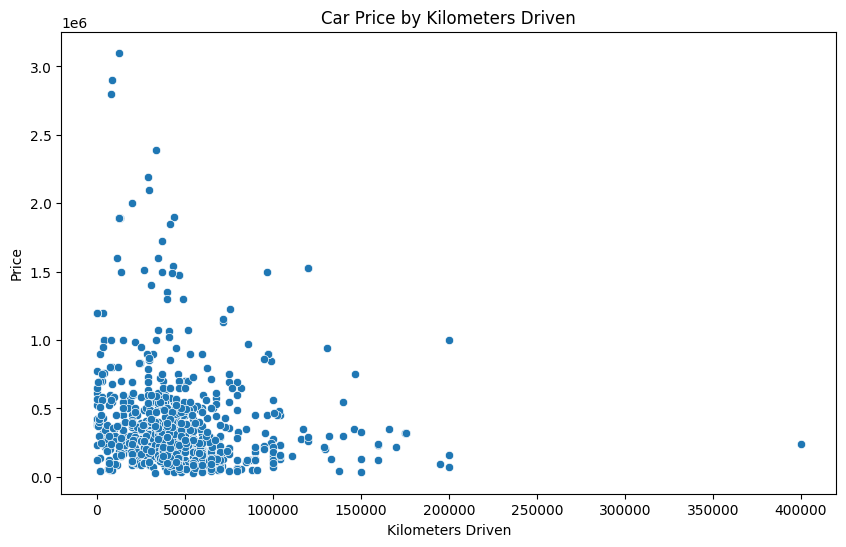

In [29]:
# Visualize the relationship between 'Price' and 'kms_driven'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=car, x='kms_driven', y='Price')
plt.title("Car Price by Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Price")
plt.show()

In [ ]:
# The more the price the less car is driven due to it require may be much cost of fuel, maintainence

Model Building

In [16]:
x=car.drop(columns='Price')
y=car['Price']

x


,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
811,Tata Indica V2,Tata,2009,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,132000,Petrol
813,Tata Zest XM,Tata,2018,27000,Diesel


In [17]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)



In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline



In [19]:
one=OneHotEncoder()
one.fit(x[['name','company','fuel_type']])


OneHotEncoder()

In [20]:
column_trans=make_column_transformer((OneHotEncoder(categories=one.categories_),['name','company','fuel_type']),remainder='passthrough')

lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [21]:
y_pred=pipe.predict(x_test)
y_pred
r2_score(y_test,y_pred)

0.6590512633624861

In [22]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)
    print(r2_score(y_test,y_pred),i)
    scores.append(r2_score(y_test,y_pred))



0.6590512633624861 0
0.47864101361059364 1
0.6209565288078942 2
0.5370348251740289 3
0.8189000105249955 4
0.6636084206855126 5
0.6276530534610085 6
0.6298809031383217 7
0.6720744938249374 8
0.5700909644396331 9
0.6484031226460932 10
0.6085770367886121 11
0.4570466649735142 12
0.6673864297121447 13
0.6654819317725842 14
0.7062352598033357 15
0.4878517328141285 16
0.6657850555701952 17
0.5884124195850122 18
0.6179613274442677 19
0.6410786653463483 20
0.6211495608346524 21
0.7365997878418484 22
0.6403431090632872 23
0.5492318934935416 24
0.4986912065358815 25
0.6732930793042606 26
0.7431341436818146 27
0.7254243075140874 28
0.6008389225119599 29
0.6245243539965448 30
0.6277517653698451 31
0.767085863452364 32
0.7853936415683003 33
0.5622444323687094 34
0.6720248640546858 35
0.5825370464922544 36
0.6169930291884536 37
0.5565188521776343 38
0.7163736487935048 39
0.3428757189969265 40
0.6733788054547118 41
0.5731604253441808 42
0.6792440762269905 43
0.6604138894878884 44
0.6974184707317115 4

In [23]:
np.argmax(scores)

433

In [24]:
scores[np.argmax(scores)]

0.8456891236558007

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.8456891236558007

In [26]:
import pickle
pickle.dump(pipe,open('carsRegression.pkl','wb'))

In [27]:
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']],columns=['name','company','year','kms_driven','fuel_type']))

array([458961.88116883])